In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 9.8 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import datetime
import math
from numpy.random import choice

import random
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime as dt

#Importing Model Packages for reinforcement learning
import tensorflow as tf
from keras import layers, models, optimizers, activations, Input
from keras import backend as K
from collections import namedtuple, deque

In [ ]:
url = 'https://raw.githubusercontent.com/Buck0134/datatest/main/dataset.csv'
ds = pd.read_csv(url,index_col=0)
ds.shape

(1007, 4)

In [ ]:
ds.head(5)

,Close,return,P/E,β
Date,,,,
6/25/18,45.54,0.012330,0.000271,0.420677
6/26/18,46.11,-0.001465,-0.000032,0.209903
6/27/18,46.04,0.007250,0.000157,0.126337
6/28/18,46.38,-0.002105,-0.000045,0.087107
6/29/18,46.28,0.011121,0.000240,0.156174


In [ ]:
ds20 = ds['Close'].to_frame()
 
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
ds['MA20'] = ds20['Close'].rolling(20).mean()
 
# removing all the NULL values using
# dropna() method
ds.dropna(inplace=True)

#printing the dataset
ds.head()

,Close,return,P/E,β,MA20
Date,,,,,
7/23/18,47.90,0.007228,0.000151,0.060162,47.0595
7/24/18,48.25,0.009386,0.000195,0.064800,47.1950
7/25/18,48.71,-0.003136,-0.000064,0.088724,47.3250
7/26/18,48.55,-0.016771,-0.000345,0.117208,47.4505
7/27/18,47.75,-0.005618,-0.000118,0.112477,47.5190


In [ ]:
ds25 = ds['Close'].to_frame()
 
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
ds['MA25'] = ds25['Close'].rolling(25).mean()
 
# removing all the NULL values using
# dropna() method
ds.dropna(inplace=True)

#printing the dataset
ds.head()

,Close,return,P/E,β,MA20,MA25
Date,,,,,,
8/24/18,54.04,0.008201,0.000152,0.020991,52.1745,51.3860
8/27/18,54.49,0.008043,0.000148,0.023207,52.5250,51.6496
8/28/18,54.93,0.014819,0.000270,0.022595,52.8930,51.9168
8/29/18,55.75,0.009152,0.000164,0.022742,53.1615,52.1984
8/30/18,56.26,0.011488,0.000204,0.020518,53.3820,52.5068


In [ ]:
print('Null Values =',ds.isnull().values.any())

Null Values = False


In [ ]:
# peek at data
set_option('display.width', 100)
ds.head(5)

,Close,return,P/E,β,MA20,MA25
Date,,,,,,
8/24/18,54.04,0.008201,0.000152,0.020991,52.1745,51.3860
8/27/18,54.49,0.008043,0.000148,0.023207,52.5250,51.6496
8/28/18,54.93,0.014819,0.000270,0.022595,52.8930,51.9168
8/29/18,55.75,0.009152,0.000164,0.022742,53.1615,52.1984
8/30/18,56.26,0.011488,0.000204,0.020518,53.3820,52.5068


In [ ]:
# describe data
set_option('precision', 3)
ds.describe()

,Close,return,P/E,β,MA20,MA25
count,962.000,9.620e+02,9.620e+02,962.000,962.000,962.000
mean,99.854,9.544e-04,1.473e-05,0.158,99.004,98.763
std,44.168,2.187e-02,3.169e-04,0.107,44.073,44.043
min,35.550,-1.377e-01,-2.658e-03,-0.012,38.193,38.308
25%,55.035,-9.164e-03,-9.799e-05,0.039,54.825,54.566
50%,96.760,1.368e-03,1.164e-05,0.195,94.310,93.383
75%,137.380,1.290e-02,1.441e-04,0.241,136.136,134.730
max,182.010,1.132e-01,1.854e-03,0.334,176.396,175.796


Text(0.5, 1.0, 'CLosing Price of VOO from \n 01-01-2019 - 01-01-2020')

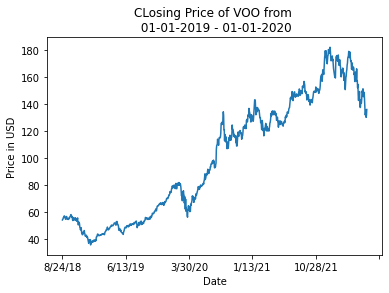

In [ ]:
ds['Close'].plot()
plt.ylabel('Price in USD')
plt.title('CLosing Price of VOO from \n 01-01-2019 - 01-01-2020') #VOO is just an index fund... Change as we may

Text(0.5, 1.0, 'Moving Average of 20 from \n 01-01-2019 - 01-01-2020')

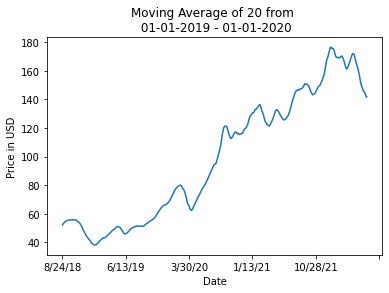

In [ ]:
ds['MA20'].plot()
plt.ylabel('Price in USD')
plt.title('Moving Average of 20 from \n 01-01-2019 - 01-01-2020') #VOO is just an index fund... Change as we may

In [ ]:
dataset_df = pd.DataFrame(ds)
X = dataset_df[["Close", "return","P/E","β"]].astype(float).reset_index()
X = X.drop("Date", axis=1) # drop date col so it doesnt add a dim to the NN

validation_size = 0.2
#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
# min_max_scaler = MinMaxScaler((0,1))
std_scaler = StandardScaler()
X_train[['Close_scaled','return_scaled','P/E_scaled','β_scaled']] = std_scaler.fit_transform(X_train)
X_test[['Close_scaled','return_scaled','P/E_scaled','β_scaled']] = std_scaler.fit_transform(X_test)
X_train, X_test

# # Adjusted for multi state dim prediction
# ## Data includes MA20 and MA25
# dataset_df = pd.DataFrame(ds)
# X = dataset_df[["Adj Close", "Volume","MA20"]].astype(float).reset_index()
# X = X.drop("Date", axis=1) # drop date col so it doesnt add a dim to the NN

# validation_size = 0.2
# #In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
# #This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
# train_size = int(len(X) * (1-validation_size))
# X_train, X_test = X[0:train_size], X[train_size:len(X)]
# # min_max_scaler = MinMaxScaler((0,1))
# std_scaler = StandardScaler()
# X_train[['adj_close_scaled','volume_scaled','MA20_scaled']] = std_scaler.fit_transform(X_train)
# X_test[['adj_close_scaled','volume_scaled','MA20_scaled']] = std_scaler.fit_transform(X_test)
# X_train, X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


(      Close  return        P/E      β  Close_scaled  return_scaled  P/E_scaled  β_scaled
 0     54.04   0.008  1.518e-04  0.021        -0.860          0.309       0.381    -1.086
 1     54.49   0.008  1.476e-04  0.023        -0.848          0.302       0.369    -1.067
 2     54.93   0.015  2.698e-04  0.023        -0.835          0.606       0.720    -1.072
 3     55.75   0.009  1.642e-04  0.023        -0.813          0.352       0.417    -1.071
 4     56.26   0.011  2.042e-04  0.021        -0.798          0.457       0.532    -1.090
 ..      ...     ...        ...    ...           ...            ...         ...       ...
 764  155.11  -0.007 -4.337e-05  0.202         1.948         -0.361      -0.179     0.457
 765  154.07  -0.034 -2.185e-04  0.202         1.919         -1.571      -0.682     0.455
 766  148.97   0.004  2.608e-05  0.201         1.778          0.115       0.020     0.453
 767  149.55  -0.010 -6.425e-05  0.201         1.794         -0.491      -0.239     0.450
 768  148.

In [ ]:
## Agent
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from IPython.core.debugger import set_trace

import numpy as np
import random
from collections import deque

trainingValues = pd.DataFrame(columns = ['date', 'hold', 'buy', 'sell', 'choice', 'episode'])
testingValues = pd.DataFrame(columns = ['date', 'hold', 'buy', 'sell', 'choice'])
# pd.to_datetime(trainingValues["date"])


class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        #State size depends and is equal to the the window size, n previous days
        self.state_size = state_size # normalized previous days, 
        self.action_size = 3 # sit, buy, sell
        self.memory = deque(maxlen=1000)
        self.inventory = []
        self.model_name = model_name
        self.is_eval = is_eval

        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99
        #self.epsilon_decay = 0.9

        #self.model = self._model()

        self.model = load_model(model_name) if is_eval else self._model()

    #Deep Q Learning model- returns the q-value when given state as input
    def _model(self):
        model = Sequential()
        #Input Layer
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        #Hidden Layers
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        #Output Layer
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(lr=0.001)) 
        return model
  
    #Return the action on the value function
    #With probability (1-$\epsilon$) choose the action which has the highest Q-value.
    #With probability ($\epsilon$) choose any action at random.
    #Intitially high epsilon-more random, later less
    #The trained agents were evaluated by different initial random condition
    #and an e-greedy policy with epsilon 0.05. This procedure is adopted to minimize the possibility of overfitting during evaluation.
 
    def act(self, state): 
        
        global trainingValues, testingValues, start, count, dataset

        #If it is test and self.epsilon is still very high, once the epsilon become low, there are no random
        #actions suggested.
        if not self.is_eval and random.random() <= self.epsilon:
            rand_action = random.randrange(self.action_size)

            #Store all values to be outputted
            # start = dataset.index[count]
            trainingValues = trainingValues.append({'date': start, 'hold' : -1, 'buy' : -1, 'sell' : -1, 'choice' : rand_action}, ignore_index = True)             
            count += 1
            return rand_action
        options = self.model.predict(state)
        #print("options")
        #print(options)
        # start = dataset.index[count]
        #Store all values to be outputted
        trainingValues = trainingValues.append({'date': start,'hold' : options[0][0], 'buy' : options[0][1], 'sell' : options[0][2], 'choice' : np.argmax(options[0])}, ignore_index = True)
        testingValues = testingValues.append({'date': start,'hold' : options[0][0], 'buy' : options[0][1], 'sell' : options[0][2], 'choice' : np.argmax(options[0])}, ignore_index = True)

        # print(testingValues)
        
        count += 1
                                                                 #gather loss data here
        #set_trace()
        #action is based on the action that has the highest value from the q-value function.
        return np.argmax(options[0])

    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])
        
        # the memory during the training phase. 
        for state, action, reward, next_state, done in mini_batch:
            target = reward # reward or Q at time t    
            #update the Q table based on Q table equation
            #set_trace()
            if not done:
                #set_trace()
                #max of the array of the predicted. 
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])              #gather loss data here 
                
            # Q-value of the state currently from the table    
            target_f = self.model.predict(state)                                                       #gather loss data here
            
            # Update the output Q table for the given action in the table     
            target_f[0][action] = target
            #train and fit the model where state is X and target_f is Y, where the target is updated. 
            self.model.fit(state, target_f, epochs=1, verbose=0)                                       #gather epoch data here (training_loss)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [ ]:
## Helper Functions
import numpy as np
import math

# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

# # returns the vector containing stock data from a fixed file 
# def getStockData(key):
#     vec = []
#     lines = open("data/" + key + ".csv", "r").read().splitlines()

#     for line in lines[1:]:
#         vec.append(float(line.split(",")[4])) #Only Close column

#     return vec

# returns the sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
def zach_sigmoid(x):
    return 1 / (1 + np.exp(-x))

# returns an an n-day state representation ending at time t
def getState(data, t, n):
    d = t - n + 1
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
    #block is which is the for [1283.27002, 1283.27002]
    #print(block)
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))

    return np.array([res])

# USED FOR TRAINING
# returns an an n-day state representation ending at time t
# feed it adj close, volume
# dataframe is used
def getNDimState(data, t, n):
  d = t - n + 1
  block = data.iloc[d:t+1] if d >= 0 else -d * data.iloc[0] + data.iloc[0:t+2] # pad with t0
  #print(block)
  res = []
  for i in range(n - 1):
    res.append(zach_sigmoid(block.iloc[i+1] - block.iloc[i]))
  #print("state")
  #print(np.array(res))
  return np.array(res)

# USED FOR TESTING
# returns an an n-day state representation ending at time t
# feed it adj close, volume
# dataframe is used
def test_getNDimState(data, t, n):

  d = t - n + 1
  block = data.iloc[d:t+1] if d >= 0 else -d * data.iloc[0] + data.iloc[0:t+2] # pad with t0
  #print(block)
  res = []
  for i in range(n - 1):
    res.append(zach_sigmoid(block.iloc[i]))
  #print(np.array(res))
  return np.array(res)

# Plots the behavior of the output
def plot_behavior(data_input, states_buy, states_sell, profit):
    fig = plt.figure(figsize=(15, 5))
    plt.plot(data_input, color='r', lw=2)
    plt.plot(
        data_input, '^', markersize=10, color='m', 
        label = 'Buying Signal', markevery=states_buy
        )
    plt.plot(
        data_input, 'v', markersize=10, color='k',
        label='Selling Signal', markevery=states_sell
    )
    plt.title('Total Gains: %f' % profit)
    plt.legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Running episode 0/3
--------------------------------
Total Profit: $1.43
--------------------------------


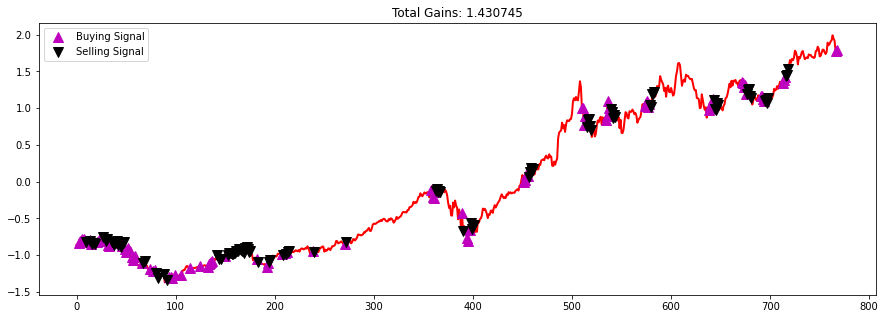

INFO:tensorflow:Assets written to: 2017/saved_models/99epsilon_default/model_ep0/assets


INFO:tensorflow:Assets written to: 2017/saved_models/99epsilon_default/model_ep0/assets


Running episode 1/3
--------------------------------
Total Profit: $1.24
--------------------------------


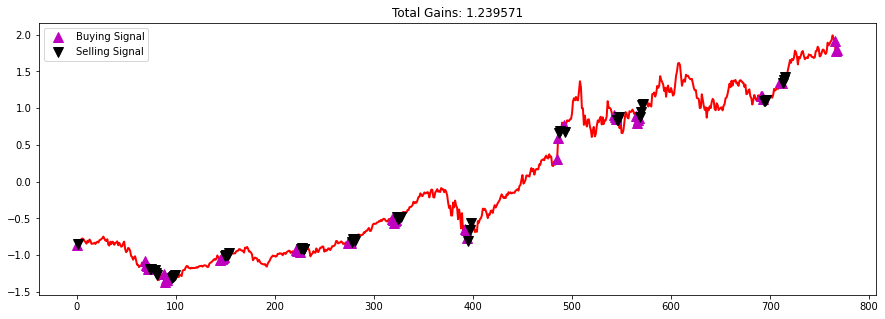

Running episode 2/3
--------------------------------
Total Profit: $1.20
--------------------------------


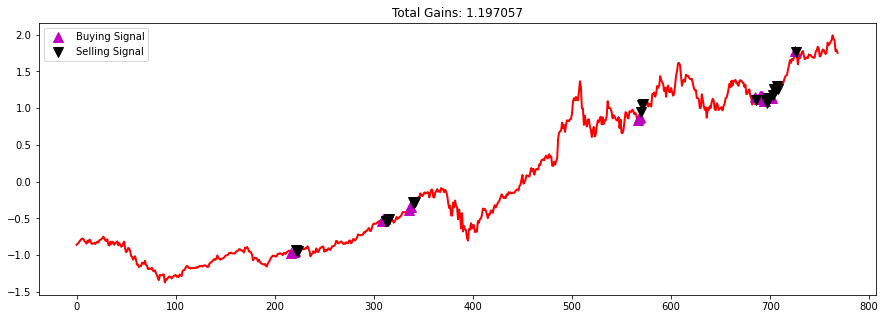

Running episode 3/3
--------------------------------
Total Profit: $1.62
--------------------------------


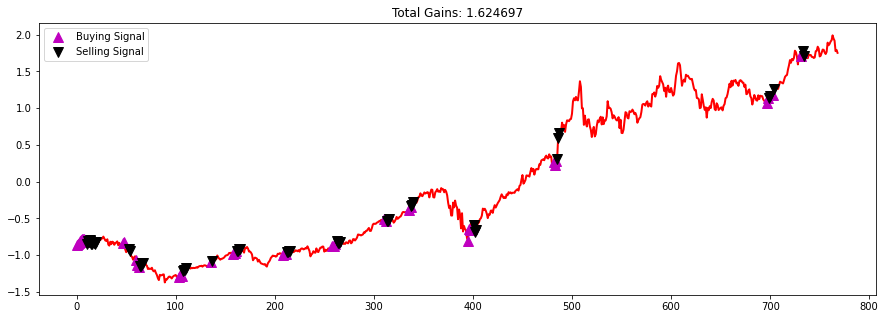

INFO:tensorflow:Assets written to: 2017/saved_models/99epsilon_default/model_ep3/assets


INFO:tensorflow:Assets written to: 2017/saved_models/99epsilon_default/model_ep3/assets


In [ ]:
from IPython.core.debugger import set_trace
window_size = 1
num_state_vals = 4 # change for number of dimensions
agent = Agent(num_state_vals)
#In this step we feed the closing value of the stock price
data = X_train
l = len(data) - 1
batch_size = 5
#An episode represents a complete pass over the data.
episode_count = 3
global trainingValues, start, count
# sigmoid_distribution = pd.DataFrame(columns = ['train_close_sigmoid', 'train_volume_sigmoid'])


for e in range(episode_count + 1):
    print("Running episode " + str(e) + "/" + str(episode_count))
    state = getNDimState(data[['Close_scaled', 'return_scaled','P/E_scaled','β_scaled']], 0, window_size + 1)
    # sigmoid_distribution = sigmoid_distribution.append({'train_close_sigmoid':state[0][0], 'train_volume_sigmoid':state[0][1]}, ignore_index=True)

    #set_trace()
    total_profit = 0                                                            
    agent.inventory = []
    states_sell = []
    states_buy = []
    start = dt.datetime(2018, 1, 1) # reset date for each episode
    count = 0
    for t in range(l):
        action = agent.act(state) 
        trainingValues.at[trainingValues.index[-1],'episode'] = e # add episode num to vis data
        # print("Action: ")   
        # print(action)
        # sit
        next_state = getNDimState(data[['Close_scaled', 'return_scaled','P/E_scaled','β_scaled']], t + 1, window_size + 1)
        # sigmoid_distribution = sigmoid_distribution.append({'train_close_sigmoid':next_state[0][0], 'train_volume_sigmoid':next_state[0][1]}, ignore_index=True)

#         print(sigmoid_distribution)
        # print("NEXT STATE")
        # print(next_state)
        reward = 0

        if action == 1: # buy
            agent.inventory.append(data["Close_scaled"].iloc[t])
            states_buy.append(t)
            #print("Buy: " + formatPrice(data[t]))

        elif action == 2 and len(agent.inventory) > 0: # sell
            bought_price = agent.inventory.pop(0)
            reward = max(data["Close_scaled"].iloc[t] - bought_price, 0)
            total_profit += data["Close_scaled"].iloc[t] - bought_price
            states_sell.append(t)
            #print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

            # trainingValues.at[trainingValues.index[-1],'daily profit'] = daily_profit
        
        #print(trainingValues) # for testing

        done = True if t == l - 1 else False
        #appends the details of the state action etc in the memory, which is used further by the exeReply function
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state

        if done:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("--------------------------------")
            #set_trace()
            #pd.DataFrame(np.array(agent.memory)).to_csv("Agent"+str(e)+".csv")
            #Chart to show how the model performs with the stock goin up and down for each 
            # trainingValues.index = trainingValues['date']
            # trainingValues.drop(['date'], axis=1)
            #trainingValues.to_csv("2017/saved_models/99epsilon_default/99epsilon_training_data.csv", mode='w', index=False)
            # sigmoid_distribution.to_csv("sigmoid_distribution.csv", mode='w', index=False)
            plot_behavior(data["Close_scaled"], states_buy, states_sell, total_profit)
              ## HERE WHY PLOT DATA ONLY USES THE DATA OF adj_close_scaled
            
        if len(agent.memory) > batch_size:
            agent.expReplay(batch_size)
            

    if e % 3 == 0:
        agent.model.save("2017/saved_models/99epsilon_default/model_ep" + str(e))

In [ ]:
# # FOR CUSTOM(NON-YFINANCE) DATA
# #import io
# #empty_df = pd.read_csv(io.BytesIO(uploaded['empty_df.csv']))
# #empty_df = pd.read_csv("2017/saved_models/2layer_default/empty_df_2layer_default.csv")
# url = 'https://raw.githubusercontent.com/Buck0134/datatest/main/empty_df.csv'
# empty_df = pd.read_csv(url,index_col=0)
# data = X_train
# window_size = 1
# num_state_vals = 2 # change for number of dimensions
# agent = Agent(num_state_vals)

# #agent is already defined in the training set above.
# test_data = empty_df.reset_index()
# shuffled_test_data = empty_df.sample(frac=1).reset_index(drop=True)

# print(shuffled_test_data)
# l_test = len(empty_df)
# state = test_getNDimState(shuffled_test_data[['empty_price_scaled', 'empty_volume_scaled']], 0, window_size + 1) # inserting state deltas to get actions for empty days(heatmap)

# total_profit = 0

# is_eval = True
# done = False
# states_sell_test = []
# states_buy_test = []

# #Get the trained model
# model_path = "2017/saved_models/99epsilon_default/model_ep2"
# agent = Agent(window_size, is_eval, model_path)
# state = getNDimState(data["empty_price_scaled"], 0, window_size + 1)
# total_profit = 0
# agent.inventory = []
# # sigmoid_distribution_test = pd.DataFrame(columns = ['test_close_sigmoid', 'test_volume_sigmoid'])

# # for X_test data
# # start = dt.datetime(2017, 1, 1)
# # end = dt.datetime(2018, 1, 1)
# # dataset = yf.download('VOO',start=start,end=end,
# #                       interval='1d')
# # testingValues = testingValues.iloc[0:0]

# for t in range(l_test):
#     action = agent.act(state)
#     #print(action)
#     #set_trace()
#     action = agent.act(state)
#     next_state = test_getNDimState(test_data, t + 1, window_size + 1)
#     # sigmoid_distribution_test = sigmoid_distribution_test.append({'train_close_sigmoid':next_state[0][0], 'train_volume_sigmoid':next_state[0][1]}, ignore_index=True)

#     reward = 0

#     if action == 1:
#         agent.inventory.append(shuffled_test_data["empty_price_scaled"].iloc[t])
#         states_buy_test.append(t)
#         #print("Buy: " + formatPrice(shuffled_test_data["empty_price_scaled"].iloc[t]))

#     elif action == 2 and len(agent.inventory) > 0:
#         bought_price = agent.inventory.pop(0)
#         reward = max(shuffled_test_data["empty_price_scaled"].iloc[t] - bought_price, 0)
#         #reward = test_data[t] - bought_price
#         total_profit += shuffled_test_data["empty_price_scaled"].iloc[t] - bought_price
#         states_sell_test.append(t)
#         #print("Sell: " + formatPrice(shuffled_test_data["empty_price_scaled"].iloc[t]) + " | profit: " + formatPrice(shuffled_test_data["empty_price_scaled"].iloc[t] - bought_price))

#     if t == l_test - 1:
#         done = True
        
#     # print("State: ", state, "Action:", action, "Reward: ", reward, "Next state: ", next_state)
#     agent.memory.append((state, action, reward, next_state, done))
#     state = next_state
#     # start = X_test.index[t]
    

#     if done:
#         print("------------------------------------------")
#         print("Total Profit: " + formatPrice(total_profit))
#         print("------------------------------------------")

# # testingValues.to_csv("testing_data.csv", index=False)
# # empty_df.to_csv("heatmap_data_2layer_default.csv", index=False) ## Optional for current methods
# # sigmoid_distribution_test.to_csv("sig_test.csv", index=False)
# plot_behavior(shuffled_test_data["empty_price_scaled"],states_buy_test, states_sell_test, total_profit)

In [ ]:
# ## TESTING GOING FOR THE FOLLOWING TWO TABS
# # FOR CUSTOM(NON-YFINANCE) DATA
# url = 'https://raw.githubusercontent.com/Buck0134/datatest/main/empty_df.csv'
# empty_df = pd.read_csv(url,index_col=0)
# data = X_train
# window_size = 1
# num_state_vals = 2 # change for number of dimensions
# agent = Agent(num_state_vals)

# #agent is already defined in the training set above.
# test_data = empty_df.reset_index()
# shuffled_test_data = empty_df.sample(frac=1).reset_index(drop=True)

# print(shuffled_test_data)
# l_test = len(empty_df)
# state = test_getNDimState(shuffled_test_data[['empty_price_scaled', 'empty_volume_scaled']], 0, window_size + 1) # inserting state deltas to get actions for empty days(heatmap)

# total_profit = 0

# is_eval = True
# done = False
# states_sell_test = []
# states_buy_test = []

# #Get the trained model
# model_path = "2017/saved_models/99epsilon_default/model_ep2"
# agent = Agent(window_size, is_eval, model_path)
# state = getNDimState(data[['adj_close_scaled', 'volume_scaled']], 0, window_size + 1)
# total_profit = 0
# agent.inventory = []
# # sigmoid_distribution_test = pd.DataFrame(columns = ['test_close_sigmoid', 'test_volume_sigmoid'])

# # for X_test data
# # start = dt.datetime(2017, 1, 1)
# # end = dt.datetime(2018, 1, 1)
# # dataset = yf.download('VOO',start=start,end=end,
# #                       interval='1d')
# # testingValues = testingValues.iloc[0:0]



In [ ]:
# for t in range(l_test):
#     action = agent.act(state)
#     #print(action)
#     #set_trace()
#     empty_df.loc[t, 'Choice'] = action
#     next_state = test_getNDimState(shuffled_test_data[['empty_price_scaled', 'empty_volume_scaled']], t + 1, window_size + 1)
#     # sigmoid_distribution_test = sigmoid_distribution_test.append({'train_close_sigmoid':next_state[0][0], 'train_volume_sigmoid':next_state[0][1]}, ignore_index=True)

#     reward = 0

#     if action == 1:
#         agent.inventory.append(shuffled_test_data["empty_price_scaled"].iloc[t])
#         states_buy_test.append(t)
#         print("Buy: " + formatPrice(shuffled_test_data["empty_price_scaled"].iloc[t]))

#     elif action == 2 and len(agent.inventory) > 0:
#         bought_price = agent.inventory.pop(0)
#         reward = max(shuffled_test_data["empty_price_scaled"].iloc[t] - bought_price, 0)
#         #reward = test_data[t] - bought_price
#         total_profit += shuffled_test_data["empty_price_scaled"].iloc[t] - bought_price
#         states_sell_test.append(t)
#         print("Sell: " + formatPrice(shuffled_test_data["empty_price_scaled"].iloc[t]) + " | profit: " + formatPrice(shuffled_test_data["empty_price_scaled"].iloc[t] - bought_price))

#     if t == l_test - 1:
#         done = True
        
#     # print("State: ", state, "Action:", action, "Reward: ", reward, "Next state: ", next_state)
#     agent.memory.append((state, action, reward, next_state, done))
#     state = next_state
#     # start = X_test.index[t]
    

#     if done:
#         print("------------------------------------------")
#         print("Total Profit: " + formatPrice(total_profit))
#         print("------------------------------------------")

# # testingValues.to_csv("testing_data.csv", index=False)
# empty_df.to_csv("heatmap_data_2layer_default.csv", index=False)
# # sigmoid_distribution_test.to_csv("sig_test.csv", index=False)
# plot_behavior(shuffled_test_data,states_buy_test, states_sell_test, total_profit)

In [ ]:
window_size = 1
data = X_train
count = 200 # start row for testing part of dataset

#agent is already defined in the training set above.
test_data = X_test.reset_index()
l_test = len(test_data) - 1
state = getNDimState(test_data[['Close_scaled', 'return_scaled','P/E_scaled','β_scaled']], 0, window_size + 1)
total_profit = 0
is_eval = True
done = False
states_sell_test = []
states_buy_test = []
#Get the trained model
model_path = "2017/saved_models/99epsilon_default/model_ep3"
agent = Agent(window_size, is_eval, model_path)
state = getNDimState(data[['Close_scaled', 'return_scaled','P/E_scaled','β_scaled']], 0, window_size + 1)
total_profit = 0
agent.inventory = []

# global testingValues # needed for writing to csv
testingValues = testingValues.iloc[0:0]

------------------------------------------
Total Profit: -$1.18
------------------------------------------


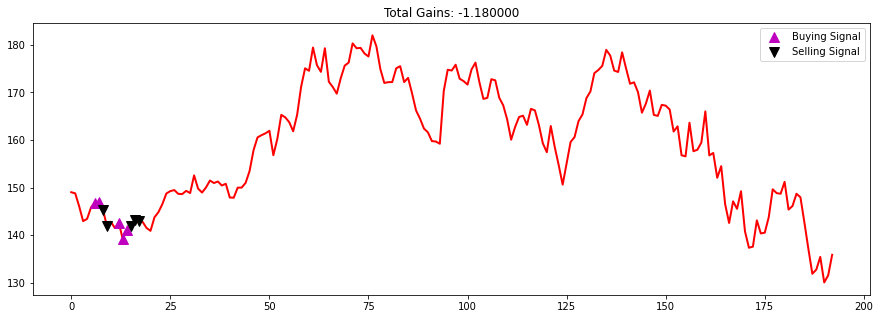

In [ ]:
for t in range(l_test):
    # print(state)
    start = ds.index[count]
    action = agent.act(state)
    #print(action)
    #set_trace()
    next_state = getNDimState(test_data[['Close_scaled', 'return_scaled','P/E_scaled','β_scaled']], t + 1, window_size + 1)
    reward = 0

    if action == 1:
        agent.inventory.append(test_data["Close"].iloc[t])
        #print(test_data["Adj Close"].iloc[t])
        states_buy_test.append(t)
        #print("Buy: " + formatPrice(test_data["Adj Close"].iloc[t]))

    elif action == 2 and len(agent.inventory) > 0:
        bought_price = agent.inventory.pop(0)
        reward = max(test_data["Close"].iloc[t] - bought_price, 0)
        #reward = test_data[t] - bought_price
        total_profit += test_data["Close"].iloc[t] - bought_price
        states_sell_test.append(t)
        #print("Sell: " + formatPrice(test_data["Adj Close"].iloc[t]) + " | profit: " + formatPrice(test_data["Adj Close"].iloc[t] - bought_price))

    if t == l_test - 1:
        done = True
    else:
        done = False
        
    # print("State: ", state, "Action:", action, "Reward: ", reward, "Next state: ", next_state)
    agent.memory.append((state, action, reward, next_state, done))
    state = next_state
    
    if len(agent.memory) > batch_size:
        agent.expReplay(batch_size)

    if done:
        print("------------------------------------------")
        print("Total Profit: " + formatPrice(total_profit))
        print("------------------------------------------")

#testingValues.to_csv("2017/saved_models/16batch_default/16batch_testing_data.csv", index=False)
plot_behavior(test_data['Close'],states_buy_test, states_sell_test, total_profit)

In [ ]:
## Calculating SHAP Value

In [ ]:
## Installing SHAP Package first

In [ ]:
pip install shap

In [ ]:
import shap

explainer = shap.Explainer(agent.model)
# type(explainer)
shap_values = explainer(X_train)
# type(X_train)
# shap_values

In [ ]:
type(X_train)

In [ ]:
agent.model.input_shape

In [ ]:
new_model_input = tf.keras.layers.Input(shape=(2,))
new_model_output = agent.model(new_model_input)
new_model = tf.keras.models.Model(inputs=new_model_input, outputs=new_model_output)

In [ ]:
import shap
explainer = shap.Explainer(new_model)
# type(explainer)
shap_values = explainer(X)

In [ ]:
new_model.input_shape

In [ ]:
## Calculating SHAP Value by hand
## Under BatchSize=3 Episode=5
ResultClose = 358
ResultCloseVolume = -278
ResultVolume = 456
SHAPClose = (0.5 * ResultClose) + (0.5 * (ResultCloseVolume-ResultVolume))
print("The SHAP Value for Close under Close&Volume Model is")
print(SHAPClose)

SHAPVolume = (0.5 * ResultVolume) + (0.5 * (ResultCloseVolume-ResultClose))
print("The SHAP Value for Volume under Close&Volume Model is")
print(SHAPVolume)

print("In the unit of $")

The SHAP Value for Close under Close&Volume Model is
-188.0
The SHAP Value for Volume under Close&Volume Model is
-90.0
In the unit of $
